# This notebook makes a phi-projection of the efficiency

In [1]:
import ROOT
from ROOT import TH1, TH1D, TH2, TFile, TMath, TCanvas, TLegend


Welcome to JupyROOT 6.10/08


In [2]:
# Get files and measured and generated photon histograms
EMCalFile = TFile("fout_efficiency_18b10a_calo_pthat1to4.root", "READ")
DCalFile = TFile("fout_efficiency_18b10b_calo_pthat1to4_v1.root", "READ")

EMCalMeasured2D = EMCalFile.Get("phi_eta_map_measured")
EMCalGenerated2D = EMCalFile.Get("phi_eta_map_generated")

DCalMeasured2D = DCalFile.Get("phi_eta_map_measured")
DCalGenerated2D = DCalFile.Get("phi_eta_map_generated")

#These are here just to provied the dividing function with a place to put the efficiencies
EMCalRatio2D = EMCalFile.Get("phi_eta_map_ratio")
DCalRatio2D = DCalFile.Get("phi_eta_map_ratio")

In [3]:
# Calculate overall efficiency ratios for both EMCal and DCal
EMCalMeasnum = EMCalMeasured2D.Integral()
EMCalGennum = EMCalGenerated2D.Integral()

DCalMeasnum = DCalMeasured2D.Integral()
DCalGennum = DCalGenerated2D.Integral()

print "Overall ratio for DCal: ", DCalMeasnum/DCalGennum
print "Overall ratio for EMCal: ", EMCalMeasnum/EMCalGennum

Overall ratio for DCal:  0.260280210856
Overall ratio for EMCal:  0.332257720873


In [4]:
# Project onto 0.2 < eta < 0.7
binmin = EMCalMeasured2D.GetYaxis().FindBin(-0.7)
binmax = EMCalMeasured2D.GetYaxis().FindBin(-0.2)
EMCalMeasured1D = EMCalMeasured2D.ProjectionX("EMCal_phi_measured", binmin, binmax)
binmin = EMCalGenerated2D.GetYaxis().FindBin(-0.7)
binmax = EMCalGenerated2D.GetYaxis().FindBin(-0.2)
EMCalGenerated1D = EMCalGenerated2D.ProjectionX("EMCal_phi_generated", binmin, binmax)

binmin = DCalMeasured2D.GetYaxis().FindBin(-0.7)
binmax = DCalMeasured2D.GetYaxis().FindBin(-0.2)
DCalMeasured1D = DCalMeasured2D.ProjectionX("DCal_phi_measured", binmin, binmax)
binmin = DCalGenerated2D.GetYaxis().FindBin(-0.7)
binmax = DCalGenerated2D.GetYaxis().FindBin(-0.2)
DCalGenerated1D = DCalGenerated2D.ProjectionX("DCal_generated", binmin, binmax)

#These are here just to provied the dividing function with a place to put the efficiencies
binmin = EMCalGenerated2D.GetYaxis().FindBin(-0.7)
binmax = EMCalGenerated2D.GetYaxis().FindBin(-0.2)
EMCalRatio1D = EMCalRatio2D.ProjectionX("EMCal_phi_ratio", binmin, binmax)
binmin = DCalGenerated2D.GetYaxis().FindBin(-0.7)
binmax = DCalGenerated2D.GetYaxis().FindBin(-0.2)
DCalRatio1D = DCalRatio2D.ProjectionX("DCal_phi_ratio", binmin, binmax)

In [5]:
# 1-D histogram division function
def divide_histograms1D(dividend, divisor, quotient):
    x_bin_min = quotient.GetXaxis().FindBin(quotient.GetXaxis().GetXmin())
    x_bin_max = quotient.GetXaxis().FindBin(quotient.GetXaxis().GetXmax())
    i = x_bin_min
    while(i <= x_bin_max):
        if (divisor.GetBinContent(i) != 0):
                quotient.SetBinContent(i, (dividend.GetBinContent(i))/(divisor.GetBinContent(i)))
            # Failsafe
        else:
            quotient.SetBinContent(i, 0)
            
        # Error propogation
        if (divisor.GetBinContent(i) == 0):
            if (dividend.GetBinContent(i) == 0):
                quotient.SetBinError(i, 0)
            else:
                quotient.SetBinError(i, (quotient.GetBinContent(i)*TMath.Sqrt(( (dividend.GetBinError(i)/dividend.GetBinContent(i)) * (dividend.GetBinError(i)/dividend.GetBinContent(i)) ) )))
        elif (dividend.GetBinContent(i) == 0):
            quotient.SetBinError(i, (quotient.GetBinContent(i)*TMath.Sqrt(( (divisor.GetBinError(i)/divisor.GetBinContent(i)) * (divisor.GetBinError(i)/divisor.GetBinContent(i)) ) )))
        else:
            quotient.SetBinError(i, (quotient.GetBinContent(i)*TMath.Sqrt(( (dividend.GetBinError(i)/dividend.GetBinContent(i)) * (dividend.GetBinError(i)/dividend.GetBinContent(i)) ) + ( (divisor.GetBinError(i)/divisor.GetBinContent(i)) * (divisor.GetBinError(i)/divisor.GetBinContent(i)) ) )))
            
        i += 1
        
    return;

Info in <TCanvas::Print>: png file EMCal_DCal_Phi_Efficiencies.png has been created


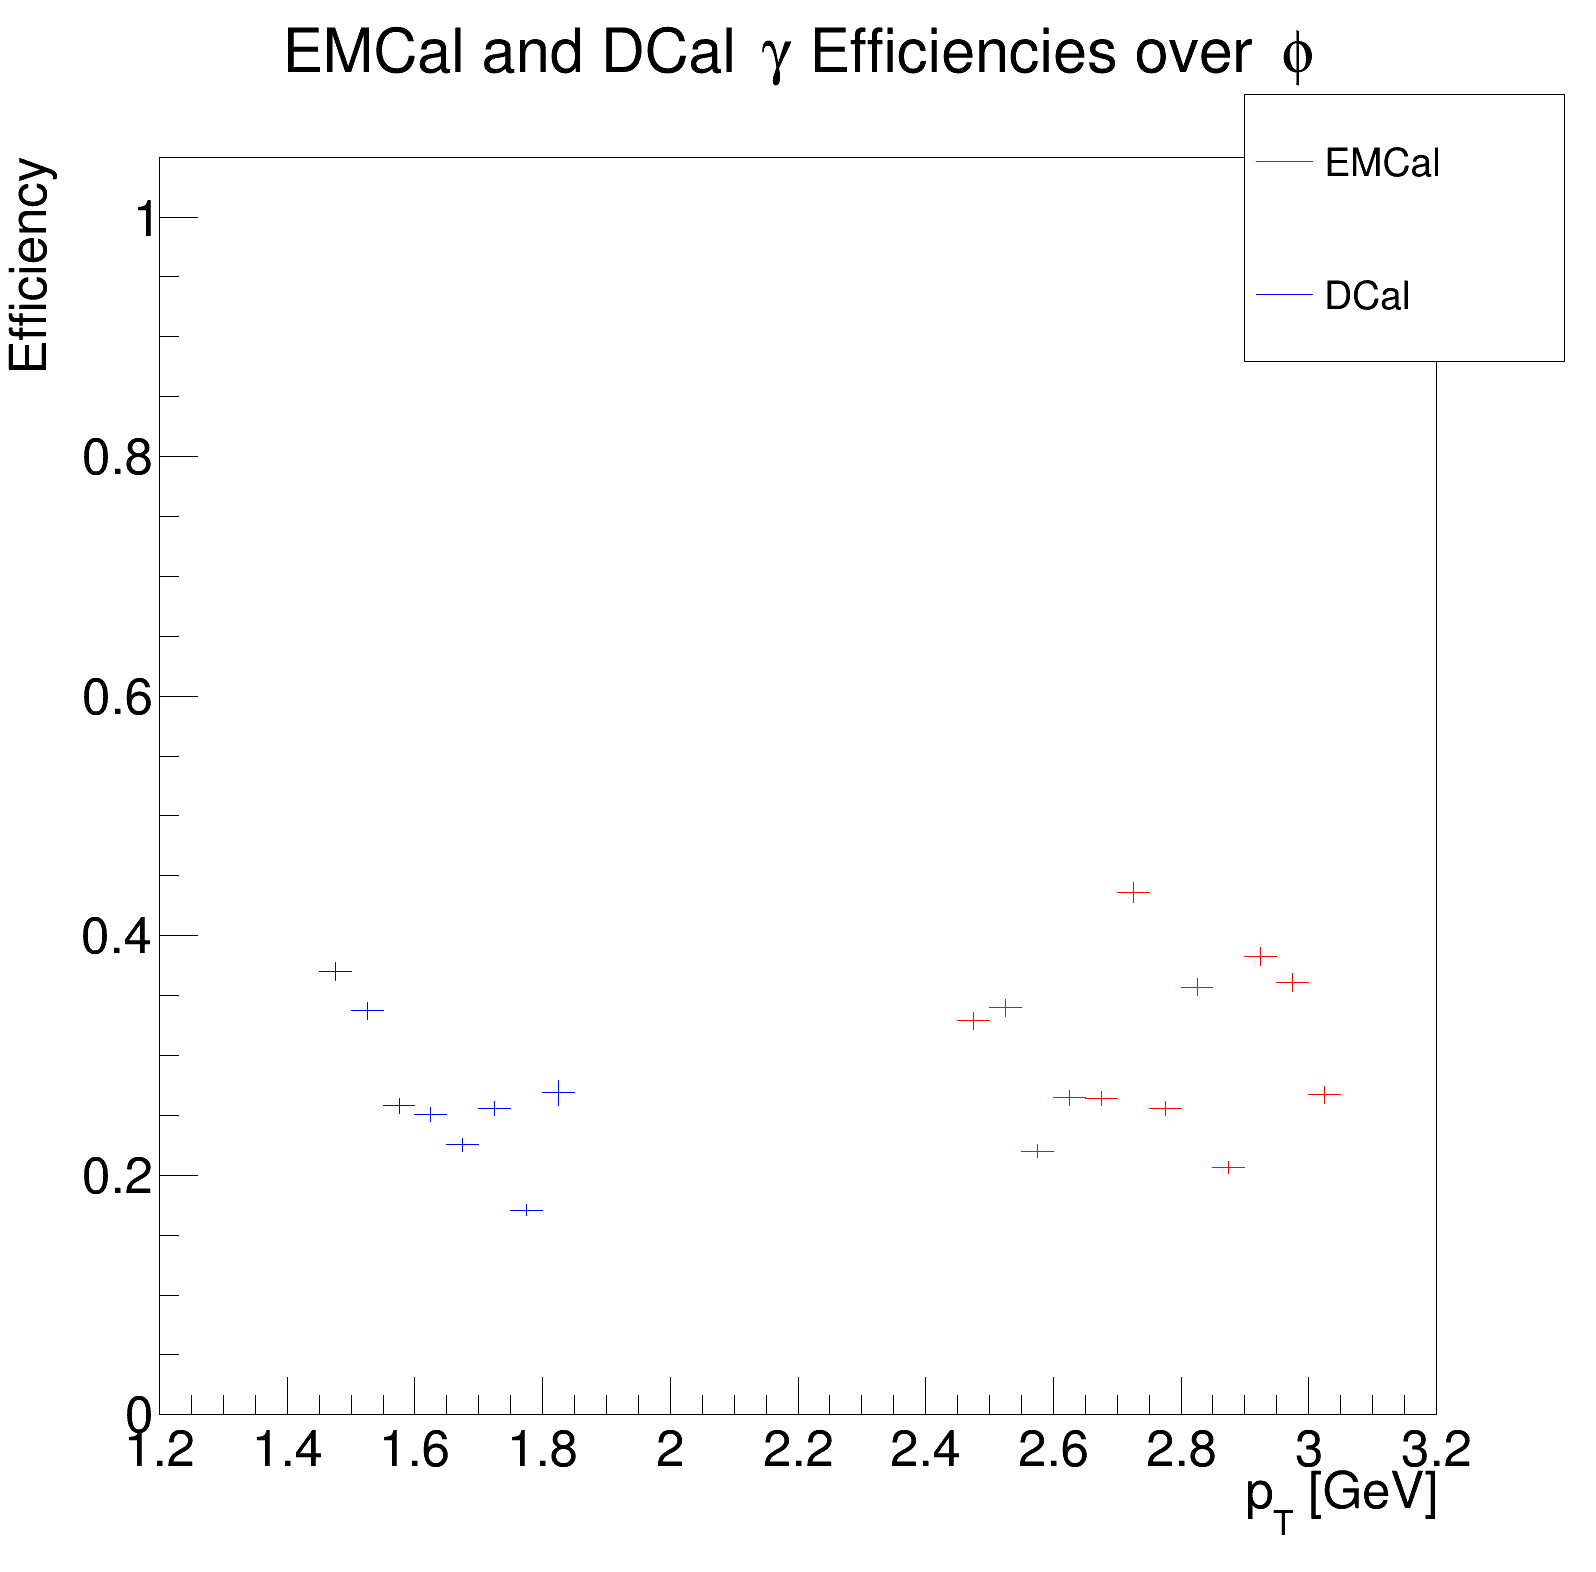

In [6]:
# Cuts
binmin = EMCalMeasured1D.GetXaxis().FindBin(2.2)
binmax = EMCalMeasured1D.GetXaxis().FindBin(3.2)
EMCalMeasured1D.GetXaxis().SetRange(binmin, binmax);
binmin = DCalMeasured1D.GetXaxis().FindBin(1.2)
binmax = DCalMeasured1D.GetXaxis().FindBin(2.2)
DCalMeasured1D.GetXaxis().SetRange(binmin, binmax);

binmin = EMCalGenerated1D.GetXaxis().FindBin(2.2)
binmax = EMCalGenerated1D.GetXaxis().FindBin(3.2)
EMCalGenerated1D.GetXaxis().SetRange(binmin, binmax);
binmin = DCalGenerated1D.GetXaxis().FindBin(1.2)
binmax = DCalGenerated1D.GetXaxis().FindBin(2.2)
DCalGenerated1D.GetXaxis().SetRange(binmin, binmax);

binmin = EMCalRatio1D.GetXaxis().FindBin(2.2)
binmax = EMCalRatio1D.GetXaxis().FindBin(3.2)
EMCalRatio1D.GetXaxis().SetRange(binmin, binmax);
binmin = DCalRatio1D.GetXaxis().FindBin(1.2)
binmax = DCalRatio1D.GetXaxis().FindBin(2.2)
DCalRatio1D.GetXaxis().SetRange(binmin, binmax);

# Create the efficiency ratios 
divide_histograms1D(EMCalMeasured1D, EMCalGenerated1D, EMCalRatio1D)
divide_histograms1D(DCalMeasured1D, DCalGenerated1D, DCalRatio1D)

# Create a "template" graph for everything to be graphed on top of
template_graph = TH1D("template_graph", "template_graph", 40, 1.2, 3.2)

# Graph them
template_graph.SetTitle("EMCal and DCal #gamma Efficiencies over #phi; p_{T} [GeV]; Efficiency")
#EMCalRatio1D.SetMaximum(1.2)
#EMCalRatio1D.SetMinimum(0.0)
EMCalRatio1D.SetMarkerColor(2)
EMCalRatio1D.SetLineColor(2)
#DCalRatio1D.SetMinimum(0.0)
DCalRatio1D.SetMarkerColor(4)
DCalRatio1D.SetLineColor(4)

c = TCanvas("c", "c", 1600, 1600)
template_graph.Draw()
EMCalRatio1D.Draw("same")
DCalRatio1D.Draw("same")
c.Draw()

# Legend
legend = TLegend(0.78, 0.77, 0.98, .94)
legend.AddEntry(EMCalRatio1D, "#scale[0.7]{EMCal}", "l")
legend.AddEntry(DCalRatio1D, "#scale[0.7]{DCal}", "l")
legend.Draw()
c.SaveAs("EMCal_DCal_Phi_Efficiencies.png")